# Finding Donors for *CharityML*
## EDA: bivariate
### Kebei Jiang 05/17/2019

### Goal

The goal of this notebook is to do initial EDA of the data. This is the part for bivariate. Here is a nice [intro](https://www.saedsayad.com/bivariate_analysis.htm) to follow. I also tried to use as little _seaborn_ as possible.

-----

### 0, data head and description

In [103]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries for visulization
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
%matplotlib inline

sns.set(color_codes=True)

In [20]:
# Load the Census dataset
data = pd.read_csv("census.csv")
ft_num = data.select_dtypes(include=['int64','float64']).columns.values
ft_cat = data.select_dtypes(exclude=['int64','float64']).columns.values
#print(ft_num)
#print(ft_cat)

-------

### 3.a, bivariate analysis: continuous vs continuous

In [21]:
ft_num

array(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'], dtype=object)

In [28]:
# first we can look at the correlations between numerical features

corr = data[ft_num].corr()
corr.style.background_gradient(cmap='Accent')

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1,0.037623,0.0796832,0.0593506,0.101992
education-num,0.037623,1,0.126907,0.0817113,0.146206
capital-gain,0.0796832,0.126907,1,-0.0321023,0.0838804
capital-loss,0.0593506,0.0817113,-0.0321023,1,0.0541949
hours-per-week,0.101992,0.146206,0.0838804,0.0541949,1


<Figure size 1440x432 with 0 Axes>

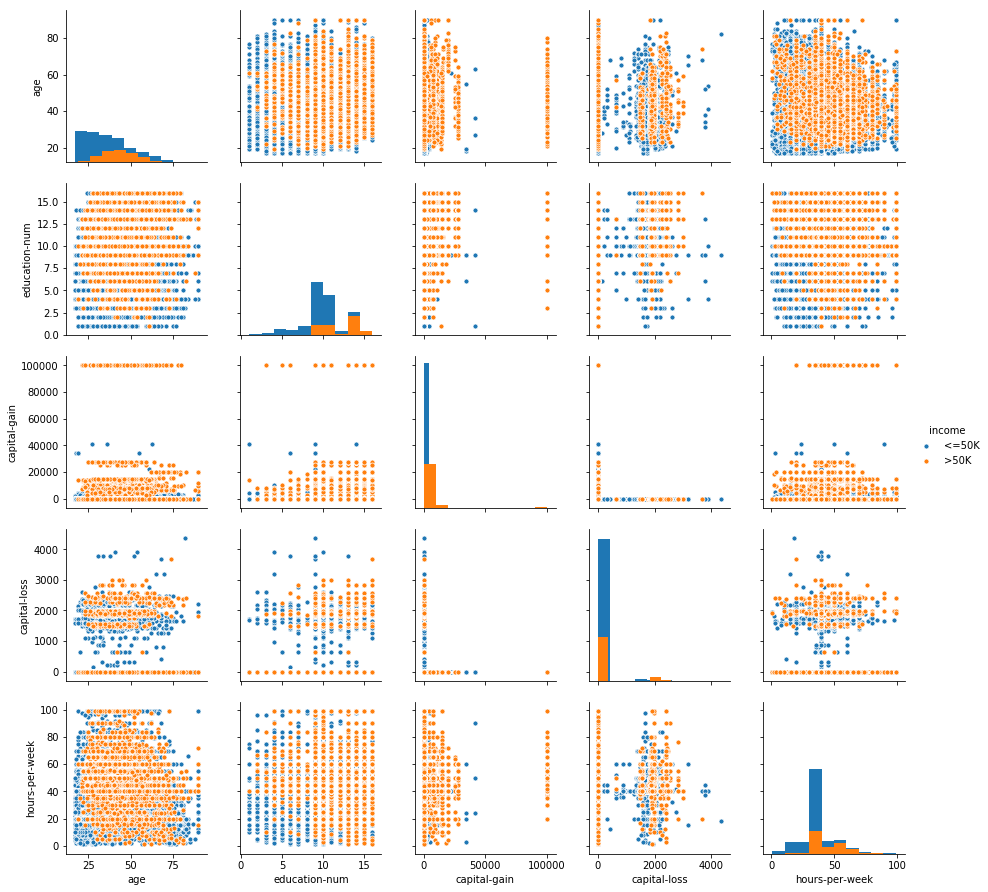

In [30]:
# then we can plot the scattering plot to see if any pattern exists between any two numerical features
# the data is color-coded by income classes

fig = plt.figure(figsize = (20,6))
sns.pairplot(data[np.append(ft_num, 'income')], diag_kind = 'hist', hue='income', plot_kws={"s": 25})
# kws is for all keyword arguments, very useful!
plt.show()

**Observations**  
 * no obvious linear correlations between numerical features  
 * no obvious patterns observed beween numerical features  

### 3.b, bivariate analysis: [categorical vs numerical](https://www.saedsayad.com/categorical_numerical.htm)  

###  ages vs incomes

Text(0, 0.5, 'percentage')

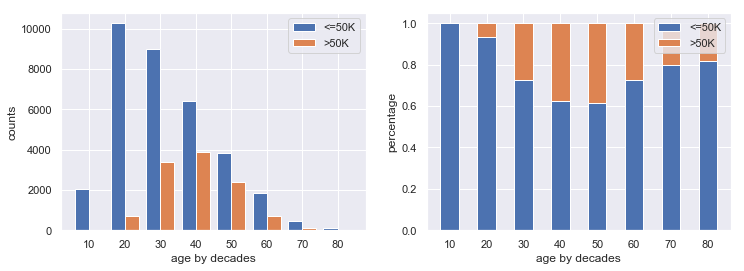

In [383]:
# age by decades
bins=np.linspace(10, 90, 9) 

# two groups
ct0, _ = np.histogram(data[data['income']=='<=50K']['age'], bins=bins)
ct1, _ = np.histogram(data[data['income']=='>50K']['age'], bins=bins)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(bins[:-1]-2, ct0, width=4, label='<=50K')
plt.bar(bins[:-1]+2, ct1, width=4, label='>50K')
plt.legend()
plt.xlabel('age by decades')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(bins[:-1], ct0/(ct0+ct1), width=5, label='<=50K')
plt.bar(bins[:-1], ct1/(ct0+ct1), width=5, bottom=ct0/(ct0+ct1), label='>50K')
plt.legend()
plt.xlabel('age by decades')
plt.ylabel('percentage')

**observation**:  
 * people younger than 20 or older than 70 make less than the rest of the population, which agrees with common sense.

### educations vs incomes

In [330]:
u, ct0 = np.unique(data[data['income']=='<=50K']['education-num'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['education-num'], return_counts=True)

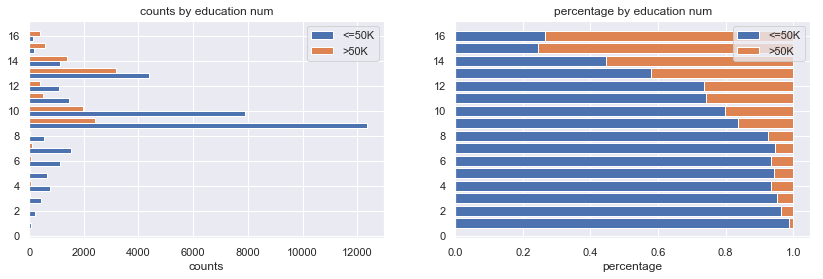

In [374]:
fig = plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.barh(u-0.2, ct0, height=0.4, label='<=50K')
plt.barh(u+0.2, ct1, height=0.4, label='>50K')
plt.legend()
plt.xlabel('counts')
plt.title('counts by education num')

plt.subplot(122)
plt.barh(u, ct0/(ct0 + ct1), label='<=50K')
plt.barh(u, ct1/(ct0 + ct1), left=ct0/(ct0 + ct1), label='>50K')
plt.legend()
plt.xlabel('percentage')
plt.title('percentage by education num')

plt.show()

**observation**:   
 *  _education-level_ and _education-num_ carry the same information, can drop either one.  
 *  higher educational level, higher chance of earning more than 50K

### hours-per-week  vs incomes

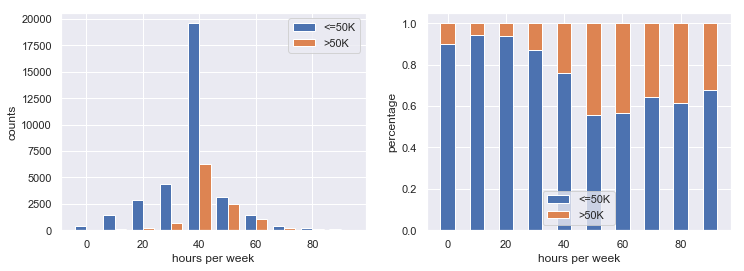

In [396]:
# hours by tens
bins=np.linspace(0, 100, 11) 

# two groups
ct0, _ = np.histogram(data[data['income']=='<=50K']['hours-per-week'], bins=bins)
ct1, _ = np.histogram(data[data['income']=='>50K']['hours-per-week'], bins=bins)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(bins[:-1]-2, ct0, width=4, label='<=50K')
plt.bar(bins[:-1]+2, ct1, width=4, label='>50K')
plt.legend()
plt.xlabel('hours per week')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(bins[:-1], ct0/(ct0+ct1), width=5, label='<=50K')
plt.bar(bins[:-1], ct1/(ct0+ct1), width=5, bottom=ct0/(ct0+ct1), label='>50K')
plt.legend()
plt.xlabel('hours per week')
plt.ylabel('percentage')

plt.show()

**Observations**  
 * People working more than 40 hours tend to have higher incomes, which makes sense
 * are the working hours and _occupation_ significantly correlated? 

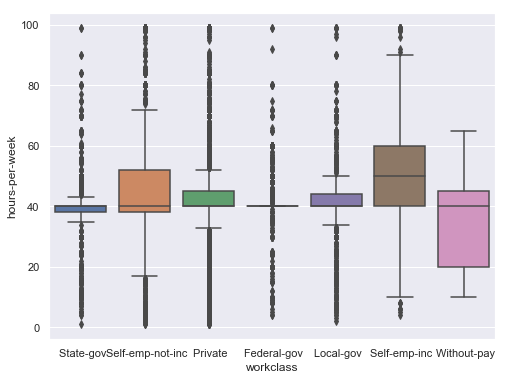

In [637]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x='workclass', y='hours-per-week', data=data)
plt.show()

### capital investments vs incomes

from unvariate analysis we already know that most people are out of market. Here we want to know how they distribute by income class

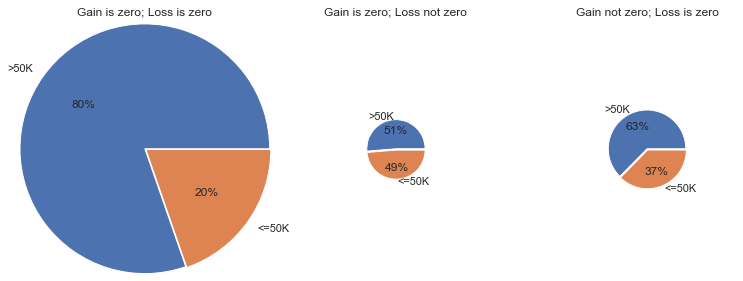

In [446]:
# three cases
# case 0: capital-gain is zero, capital-loss is zero
# case 1: capital-gain is zero, capital-loss not zero
# case 2: capital-gain not zero, capital-loss is zero

# the operator trick!
import operator as ops
x = lambda a: 'is' if a==ops.eq else 'not'

fig = plt.figure(figsize = (12,6))

for i, op in enumerate(((ops.eq, ops.eq), (ops.eq, ops.ne), (ops.ne, ops.eq))):
    count = data[op[0](data['capital-gain'],0) & op[1](data['capital-loss'],0)]['income'].value_counts()

    radius = 2*np.sqrt(np.sum(count)/data.shape[0])  # size of the pie is proportional to the size of the dataset

    ax = fig.add_subplot(1, 3, i+1)
    ax.pie(count, labels=['>50K', '<=50K'], radius=radius, autopct='%.0f%%', shadow=False, explode=(0, 0.02))
    

    ax.set_title('Gain {} zero; Loss {} zero'.format(x(op[0]), x(op[1])), loc='center', pad=50)

plt.subplots_adjust(hspace=2, wspace=0.5)

The ratios of income classes are quite different for different cases. This may suggest removing zero values or create a new category. Next, let's look at the distribution of these two features with zero values removed.

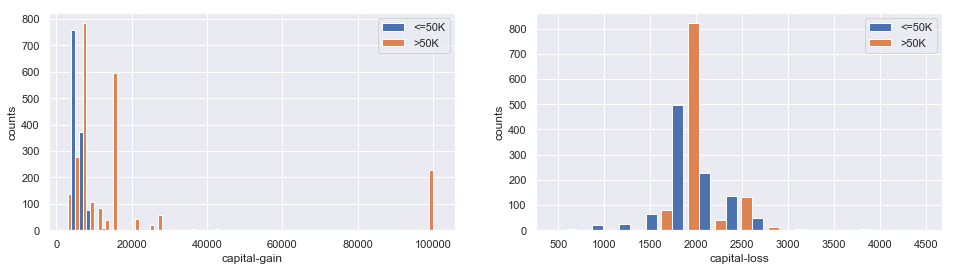

In [592]:
# plotting
fig = plt.figure(figsize=(16, 4))

for i, (ft, bin_num, width) in enumerate(zip(('capital-gain', 'capital-loss'), (51, 16), (1000, 120))):
    bins = np.linspace(data[ft].min(), data[ft].max()+1, bin_num) 

# two groups
    ct0, _ = np.histogram(data[data['income']=='<=50K'][ft], bins=bins)
    ct1, _ = np.histogram(data[data['income']=='>50K'][ft], bins=bins)

    fig.add_subplot(1,2, i+1)
    plt.bar(bins[2:]+width/2, ct0[1:], width=width, label='<=50K')
    plt.bar(bins[2:]-width/2, ct1[1:], width=width, label='>50K')
    plt.legend()
    plt.xlabel('{}'.format(ft))
    plt.ylabel('counts')

plt.show()

A few things came to my notice:  
 * people with high _capital-gain_ tend to earn more income; however, there're a few outliers  
 * _capital-loss_ is not a good indicator for income classes

**Observations**  
 * gain and loss are the net income from capital investment. People with zero gain and loss are simply outta market. (May consider combining these two into one, i.e., _capital = capital-gain + (-1)*capital-loss._ )  
 * The ratios of income classes are quite different when capital is not zero. This may suggest removing zero values or create a new category.  
 * Possible outliers with high _capital-gain_ but low income.

### 3.c, bivariate analysis: categorical vs categorical

The correlation between categorical features are usually quantifized by Chi-square value. Here is some good introductions: [The Search for Categorical Correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) and [Chi-square and correlation](http://adata.site.wesleyan.edu/schedule/chi-square-and-correlation/).

In [8]:
import scipy.stats as ss

In [9]:
# from The Search for Categorical Correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [10]:
import itertools as it

cramers_vs = []
for i in it.product(ft_cat, repeat = 2):
    cramers_vs.append(cramers_v(data[i[0]], data[i[1]]))

cramers_vs = np.reshape(cramers_vs, (len(ft_cat),len(ft_cat)))

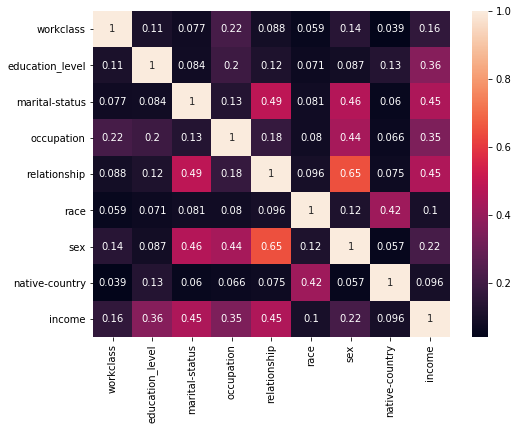

In [11]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(cramers_vs, xticklabels=ft_cat, yticklabels=ft_cat, annot=True)
plt.show()

'relationship' and 'martial-status' have the highest correlation with 'income'. Meanwhile, 'sex' has strong correlation with 'marital-status', 'occupation' and 'relationship'.

### Wrok class vs income

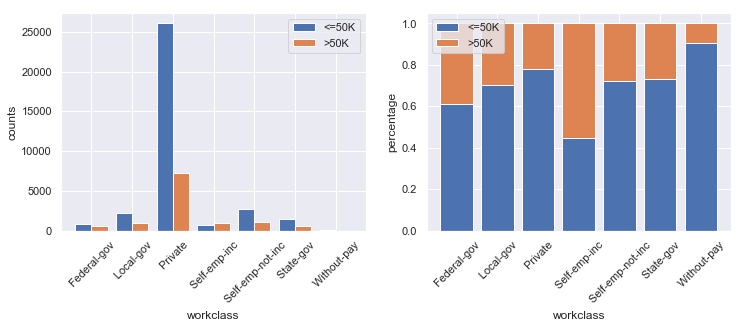

In [623]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['workclass'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['workclass'], return_counts=True)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(1, 8)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 8)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=45)
plt.legend()
plt.xlabel('workclass')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 8), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 8), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=45)
plt.legend()
plt.xlabel('workclass')
plt.ylabel('percentage')

plt.show()

**Observations** 

Apparently, we have a lot of 'private' workers. This give me a better understanding of the classes:  
 * 'gov' related: federal level has higher income than local and state  
 * 'private' is privately owned companies, they make up most of the population and has the 2nd lowest >50K proportion.  
 * the difference between 'self-emp-inc' and 'self-emp-not-inc' are summarized in this [article](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html).  

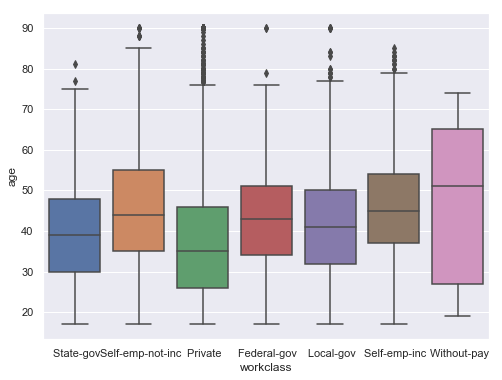

In [636]:
#  'Without-pay' is NOT related to age
fig = plt.figure(figsize=(8,6))
sns.boxplot(x='workclass', y='age', data=data)
plt.show()

### marital-status vs income

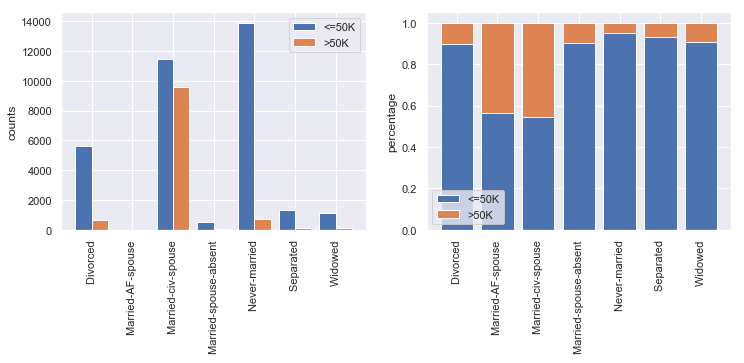

In [643]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['marital-status'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['marital-status'], return_counts=True)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(1, 8)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 8)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 8), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 8), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('percentage')

plt.show()

**observations**  
 * Married-AF-spouse = Armed Forces, Married-civ-spouse = Civilian   
 * see how 'Married-civ-spouse' earns way more than any other category? We are dealing with **househould** income!  
 * So the person listed is the bread winner of the household? Do we have people from the same family? (We can **ASSUME** there is none, coz there's no way to tell from the data)


### relationship vs incomes

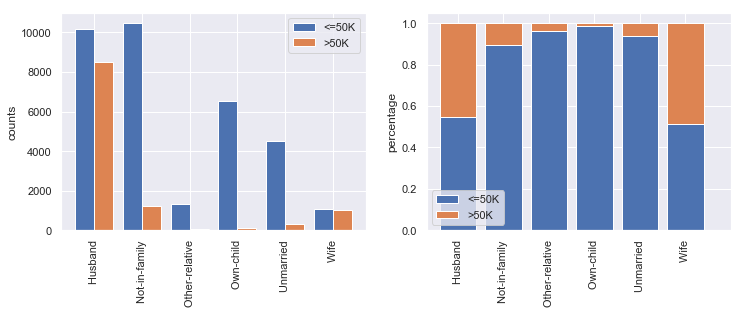

In [650]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['relationship'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['relationship'], return_counts=True)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(1, 7)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 7)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 7), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 7), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 7), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('percentage')

plt.show()

**Observations**  
 * People who are listed as 'Own-child' are single; 'Other-relative' might be grandparents.  
 * See how similar is the ratio between 'Husband', 'Wife' and 'Married-civ-spouse'? 'relationship' and 'Marital-status' actually have the same correlation with 'income'.
 * We can actually divide this feature into 'complete' and 'incomplete' where the former overlaps with 'Married'. Therefore we can **combine 'relationship' and 'Martial-Status'**  

### Occupation

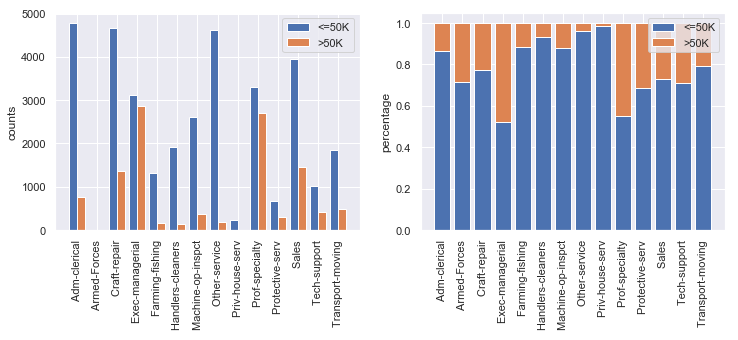

In [653]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['occupation'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['occupation'], return_counts=True)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(1, 15)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 15)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 15), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 15), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 15), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 15), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('percentage')

plt.show()

**Observations**  
 * relation with workclass?

In [654]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [655]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

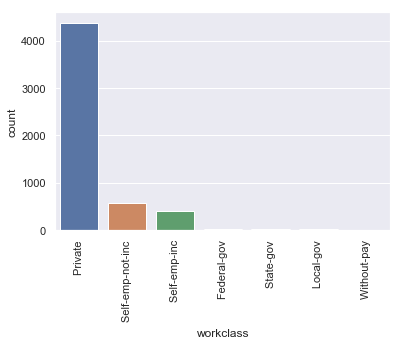

In [665]:
sns.countplot(data[data['occupation']==' Sales']['workclass'])
plt.xticks(rotation=90)

In [691]:
xtab = pd.crosstab(data['workclass'], data['occupation'])
xtab = xtab/xtab.sum() # normalize within each occupation
xtab

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,0.087726,1.0,0.015282,0.044285,0.006081,0.017107,0.006397,0.011231,0.0,0.039780,0.047131,0.003143,0.066197,0.015544
Local-gov,0.075090,0.0,0.034551,0.054980,0.029054,0.031281,0.007407,0.061356,0.0,0.173768,0.460041,0.002959,0.040845,0.067358
Private,0.749278,0.0,0.777741,0.657420,0.447973,0.928152,0.954882,0.821755,1.0,0.550932,0.301230,0.808802,0.797183,0.798359
Self-emp-inc,0.007942,0.0,0.026246,0.100267,0.055405,0.002933,0.004714,0.008735,0.0,0.040280,0.005123,0.075259,0.006338,0.015976
Self-emp-not-inc,0.012455,0.0,0.130565,0.095922,0.439865,0.010264,0.019529,0.056988,0.0,0.093542,0.007172,0.106139,0.029577,0.076857
State-gov,0.066968,0.0,0.015449,0.046959,0.016216,0.009286,0.006397,0.039517,0.0,0.101698,0.179303,0.003513,0.059859,0.025475
Without-pay,0.000542,0.0,0.000166,0.000167,0.005405,0.000978,0.000673,0.000416,0.0,0.000000,0.000000,0.000185,0.000000,0.000432


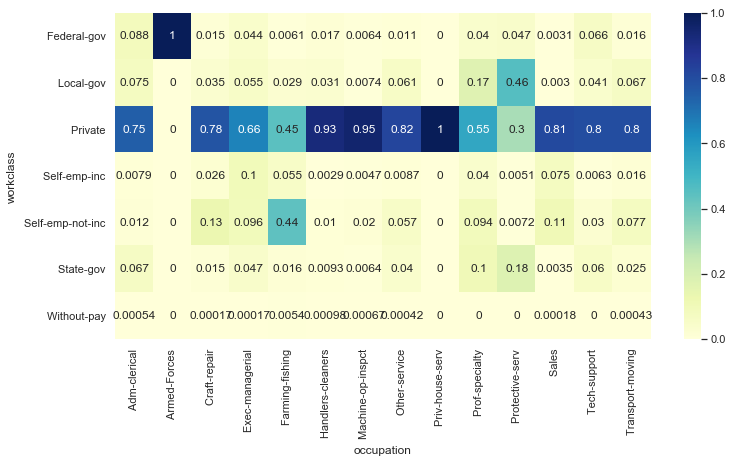

In [694]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(xtab, annot=True, cmap="YlGnBu")
plt.show()

-----

In general, we can ask where the difference beween averages of groups (e.g., 'Male' and 'Female') of some numerical feature (e.g., 'capital-gain') is significant or not. The usual statistical tools are _Z-test_ (for two categories) and _ANOVA_ (for more than two.) See discussion at the end of this section.    

In our case, coz no obvious pattern was found between numerical features, we shall see if they behave differents when income class is different.

In [45]:
# As an example, let's check 'hours-per-week' against different 'sex'
# apparently the zero P value indicates significant difference in averages

sexs = pd.unique(data['sex'].values)
d_data = {sex:data['hours-per-week'][data['sex']==sex] for sex in sexs}

f, p = ss.stats.f_oneway(d_data[' Male'], d_data[' Female'])
f, p

(2558.9124323790147, 0.0)

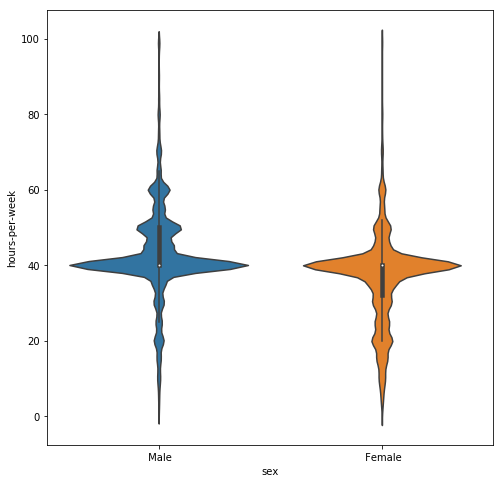

In [59]:
# double check with a box plot

fig = plt.figure(figsize=(8, 8))
sns.violinplot(x='sex', y='hours-per-week', data=data,  inner="box")
plt.show()

**Cons**  
 * Assumptions hard to meet  
 * Cannot pinpoint the exact feature when there're more than two of them  
 * Can be replaced by visualizations

-----